In [1]:
'''Index :
0 - Extremely Weak
1 - Weak
2 - Normal
3 - Overweight
4 - Obesity
5 - Extreme Obesity

hieght in cm
weight in kilogram'''

'Index :\n0 - Extremely Weak\n1 - Weak\n2 - Normal\n3 - Overweight\n4 - Obesity\n5 - Extreme Obesity\n\nhieght in cm\nweight in kilogram'

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [3]:
dat =pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
dat.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
dat.Height.min()

140

In [7]:
dat.Height.max()

199

In [8]:
dat.Weight.min()

50

In [9]:
dat.Weight.max()

160

In [10]:
type(dat.Weight.count())

numpy.int64

In [11]:
dat1=dat

In [12]:
for i in range(0,dat.Weight.count()):
    if dat.Weight[i]>=120:
        dat1 =dat1.drop(index=i)
    

In [13]:
dat1.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [14]:
dat1.count()

Gender    312
Height    312
Weight    312
Index     312
dtype: int64

In [15]:
# Male = 0, Female = 1
gender= {"Male": 0, "Female":1}


In [16]:
dat.Gender=[gender[item] for item in dat.Gender]

In [17]:
dat.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [18]:
x=dat.drop("Index", axis =1)

In [19]:
x.head()

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [20]:
y=dat.Index

In [21]:
y.head()

0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.3)

In [24]:
clf = tree.DecisionTreeClassifier()

In [25]:
clf.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [26]:
model_pre=clf.predict(x_te)

In [27]:
y_te.head()

115    3
252    5
160    2
347    2
236    5
Name: Index, dtype: int64

In [28]:
model_pre[:5]

array([2, 5, 2, 2, 5])

In [29]:
accuracy_score(y_te,model_pre)

0.8

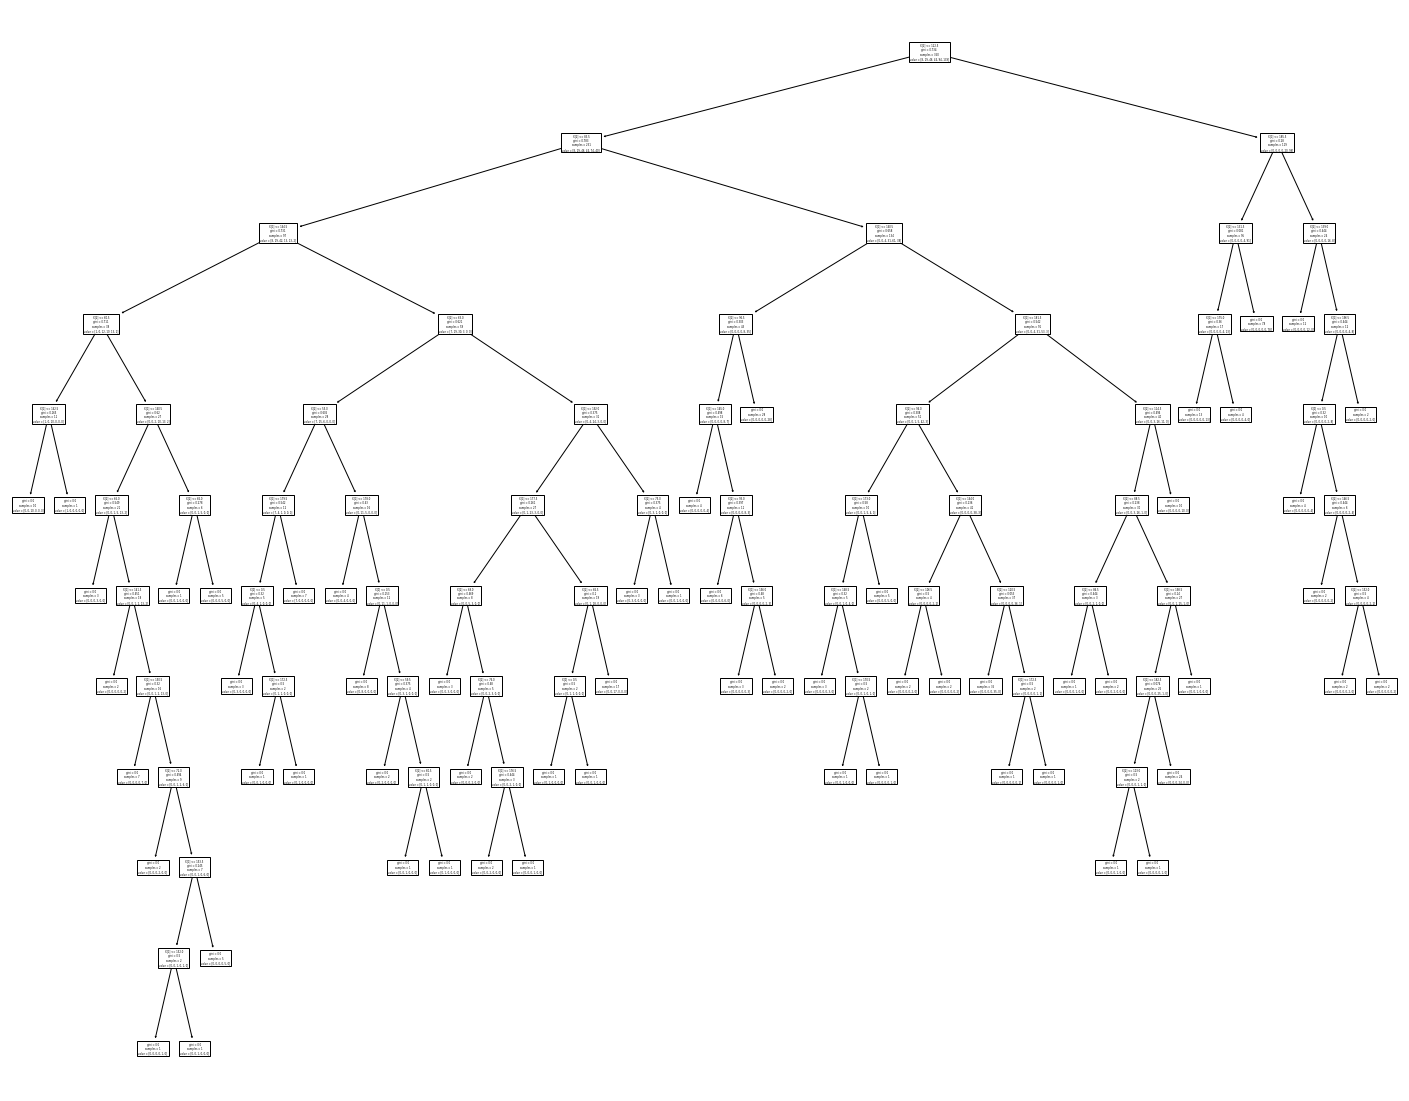

In [30]:
fig=plt.figure(figsize=(25,20))
_ =tree.plot_tree(clf) 

In [31]:
fig.savefig("a.png")

In [32]:
rep = tree.export_text(clf)

In [33]:
print(rep)

|--- feature_2 <= 122.50
|   |--- feature_2 <= 83.50
|   |   |--- feature_1 <= 164.50
|   |   |   |--- feature_2 <= 60.50
|   |   |   |   |--- feature_1 <= 162.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  162.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  60.50
|   |   |   |   |--- feature_1 <= 160.50
|   |   |   |   |   |--- feature_2 <= 65.00
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_2 >  65.00
|   |   |   |   |   |   |--- feature_1 <= 141.50
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_1 >  141.50
|   |   |   |   |   |   |   |--- feature_1 <= 150.50
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_1 >  150.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 72.00
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_2 >  72.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 153.50
|   |   | 

In [34]:
'''Feature 0 : gender
Feature 1 : heaight
Feature 2 : Weight'''

'Feature 0 : gender\nFeature 1 : heaight\nFeature 2 : Weight'